### H2O

In [1]:
import h2o
import numpy as np
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [2]:
# Inicializa el cluster de H2O y mostrar info del cluster en uso
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from C:\Users\Daniel\AppData\Local\Programs\Python\Python38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Daniel\AppData\Local\Temp\tmpfywx2xjx
  JVM stdout: C:\Users\Daniel\AppData\Local\Temp\tmpfywx2xjx\h2o_Daniel_started_from_python.out
  JVM stderr: C:\Users\Daniel\AppData\Local\Temp\tmpfywx2xjx\h2o_Daniel_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,2 months and 16 days
H2O_cluster_name:,H2O_from_python_Daniel_inu7uz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.828 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


### Ahora, al igual que se hacia en SAM, cargaremos los datos de los espectros

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import BatchNormalization



import requests
from bs4 import BeautifulSoup
import os
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm
import time


from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
espc = fits.open('DataDESI_691_752.fits') #open file
wave= fits.open('B_R_Z_wavelenght.fits')
espc.info() #resume el contenido de la tabla
wave.info()

Filename: DataDESI_691_752.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     26   89878R x 9C   [7A, D, D, 7A, D, 21A, D, D, 7A]   
  2  B_FLUX        1 ImageHDU         8   (2751, 89878)   float32   
  3  R_FLUX        1 ImageHDU         8   (2326, 89878)   float32   
  4  Z_FLUX        1 ImageHDU         8   (2881, 89878)   float32   
Filename: B_R_Z_wavelenght.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  B_WAVELENGHT    1 ImageHDU         7   (2751,)   float64   
  2  R_WAVELENGHT    1 ImageHDU         7   (2326,)   float64   
  3  Z_WAVELENGHT    1 ImageHDU         7   (2881,)   float64   


In [5]:
flux_b=espc[2].data
flux_r=espc[3].data
flux_z=espc[4].data

Spectra=np.hstack((flux_b, flux_r, flux_z)) #Contiene la cadena completa de flujo B+Z+R para cada espectro
#Spectra=Spectra.reshape(Spectra.shape[0], Spectra.shape[1], 1)

In [6]:
Spectra

array([[-44.954617  , -17.544868  ,   5.971389  , ...,   6.8704705 ,
          7.178707  ,   5.4901958 ],
       [ -5.7764893 , -10.645928  ,   6.788937  , ...,   1.8684504 ,
         -0.39677802,   2.1346123 ],
       [-46.51395   , -12.42423   , -10.564693  , ...,   1.7962582 ,
          2.0902228 ,   2.035537  ],
       ...,
       [ -3.0887322 ,   3.9484348 ,   9.715307  , ...,   1.6537042 ,
          1.3760386 ,   2.2182627 ],
       [ -2.642887  ,   0.72672445,   3.5981445 , ...,   0.32732147,
          0.43141416,  -0.146458  ],
       [-12.016526  ,   7.6717296 ,  -0.5498936 , ...,   0.18873805,
          0.97489774,   1.4603783 ]], dtype=float32)

In [7]:
Table.read(espc, hdu=1)

SPECTYPE,Z,TARGETID,OBJTYPE,Z_ERR,SUBTYPE,TARGET_RA,TARGET_DEC,MORPHTYPE
str7,float64,float64,str7,float64,str21,float64,float64,str7
GALAXY,0.12304444393698347,3.963298676893649e+16,TGT,4.1065983890874034e-05,0.0,251.15602592812982,35.15999350466772,SER
GALAXY,0.29457611574915027,3.963298676893617e+16,TGT,1.5230988695018649e-05,0.0,251.13617942652738,35.298171294155715,REX
GALAXY,0.26295948028332505,3.963298677312854e+16,TGT,1.8882726599351002e-05,0.0,251.29263317255828,35.2563912473969,REX
GALAXY,1.1613819989817356,6.160937390723566e+17,SKY,9.201895922269369e-05,0.0,251.18910901219022,35.19275651875039,0.0
GALAXY,0.26355166471566344,3.963298677312746e+16,TGT,3.503667072881993e-05,0.0,251.22081435317995,35.196753502348336,EXP
GALAXY,0.08709363315046506,3.963298677312904e+16,TGT,3.865175488516558e-06,0.0,251.32575334761174,35.28205469932947,EXP
GALAXY,0.26495553753651446,3.9632986768936136e+16,TGT,7.675386768239847e-05,0.0,251.13412200880515,35.23854486920474,SER
STAR,-0.00017170741474576307,3.963298676474267e+16,TGT,6.297295578494421e-06,G,250.85477816221342,35.164102405409004,PSF
GALAXY,0.1138600133189154,3.963298676893551e+16,TGT,7.161186384705142e-05,0.0,251.09286363782294,35.15489017306431,SER


In [8]:
STYPE= Table.read(espc, hdu=1)['SPECTYPE'].data
RA= Table.read(espc, hdu=1)['TARGET_RA'].data
DEC= Table.read(espc, hdu=1)['TARGET_DEC'].data

### Para que sea facil nuestro ejercicio unicamente trabajamos con los primeros datos

In [9]:
i=None

In [10]:
Spectra = Spectra[:i]

In [22]:
Spectra

array([[-44.954617  , -17.544868  ,   5.971389  , ...,   6.8704705 ,
          7.178707  ,   5.4901958 ],
       [ -5.7764893 , -10.645928  ,   6.788937  , ...,   1.8684504 ,
         -0.39677802,   2.1346123 ],
       [-46.51395   , -12.42423   , -10.564693  , ...,   1.7962582 ,
          2.0902228 ,   2.035537  ],
       ...,
       [ -3.0887322 ,   3.9484348 ,   9.715307  , ...,   1.6537042 ,
          1.3760386 ,   2.2182627 ],
       [ -2.642887  ,   0.72672445,   3.5981445 , ...,   0.32732147,
          0.43141416,  -0.146458  ],
       [-12.016526  ,   7.6717296 ,  -0.5498936 , ...,   0.18873805,
          0.97489774,   1.4603783 ]], dtype=float32)

In [12]:
STYPE= STYPE[:i]
RA= RA[:i]
DEC= DEC[:i]

In [13]:
STYPE

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U7')

### Traducimos estos datos a H20Frame

In [23]:
#Creamos el H2O frame con una columna
datos = h2o.H2OFrame(python_obj=RA, column_names=['TARGET_RA'], column_types=["float"])

#Agregamos mas columnas al frame que hemos creado
dec_h2o= h2o.H2OFrame(python_obj=DEC, column_names=['TARGET_DEC'], column_types=["float"])
datos= datos.cbind(dec_h2o)

#Agregamos mas columnas al frame que hemos creado
spectype_h2o= h2o.H2OFrame(python_obj=STYPE, column_names=['SPECTYPE'], column_types=["string"])
datos= datos.cbind(spectype_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
RA

array([251.15602593, 251.13617943, 251.29263317, ..., 246.98792762,
       246.44532943, 246.72025298])

In [16]:
DEC

array([35.1599935 , 35.29817129, 35.25639125, ..., 44.83986578,
       44.3640158 , 44.51243339])

In [17]:
datos

TARGET_RA,TARGET_DEC,SPECTYPE
251.156,35.16,GALAXY
251.136,35.2982,GALAXY
251.293,35.2564,GALAXY
251.189,35.1928,GALAXY
251.221,35.1968,GALAXY
251.326,35.2821,GALAXY
251.134,35.2385,GALAXY
250.855,35.1641,STAR
251.093,35.1549,GALAXY
251.125,35.12,STAR


In [20]:
datos[0,0]

251.15602592812985

#Agregamos mas columnas al frame que hemos creado
flujo_h2o= h2o.H2OFrame(python_obj=Spectra, column_names=['FLUX'], column_types=["enum"])
datos= datos.cbind(flujo_h2o)

### Elegimos las variables ojetivo (etiquetas) y las predictoras

In [18]:
# Convierte la variable objetivo a factor utilizando la función asfactor()
datos['SPECTYPE'] = datos['SPECTYPE'].asfactor()

In [19]:
# Define las columnas predictoras y la variable objetivo
predictores = datos.columns[:-1]  # Todas las columnas excepto la última (SPECTYPE)
objetivo='SPECTYPE'

### Dividimos datos y creamos una Red neuronal con H2O

In [20]:
# Divide el conjunto de datos en entrenamiento y prueba
train, test = datos.split_frame(ratios=[0.6], seed=42)
# train, test = datos.split_frame(ratios=[0.6], seed=42, stratified=SPECTYPE)

In [21]:
test

TARGET_RA,TARGET_DEC,SPECTYPE
251.136,35.2982,GALAXY
251.022,35.1235,STAR
251.068,35.1715,STAR
251.127,35.2855,GALAXY
251.086,35.1922,STAR
250.95,35.1091,GALAXY
251.093,35.1251,GALAXY
251.129,35.2169,GALAXY
250.97,35.2642,GALAXY
250.993,35.1524,GALAXY


In [22]:
# Configura y entrena el modelo de red neuronal
modelo_nn = H2ODeepLearningEstimator(epochs=100, hidden=[64, 128, 256, 256], distribution="multinomial", activation="RectifierWithDropout", variable_importances=True)
#modelo_nn = H2ODeepLearningEstimator(epochs=10, hidden=[10, 10], distribution="multinomial", activation="RectifierWithDropout", variable_importances=True)
modelo_nn.train(x=predictores, y=objetivo, training_frame=train, validation_frame=test)

# Imprime métricas de rendimiento en el conjunto de prueba
print(modelo_nn.model_performance(test_data=test))

# Obtener las importancias de las variables
importancias_variables = modelo_nn.varimp()
# Imprimir las importancias de las variables
print(importancias_variables)


#Random forest, gradient boosting

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.2602500185741389
RMSE: 0.5101470558320795
LogLoss: 0.7393802169582012
Mean Per-Class Error: 0.6666666666666666
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
GALAXY    QSO    STAR    Error     Rate
--------  -----  ------  --------  ---------------
20247     0      0       0         0 / 20,247
424       0      0       1         424 / 424
15261     0      0       1         15,261 / 15,261
35932     0      0       0.436519  15,685 / 35,932

Top-3 Hit Ratios: 
k    hi

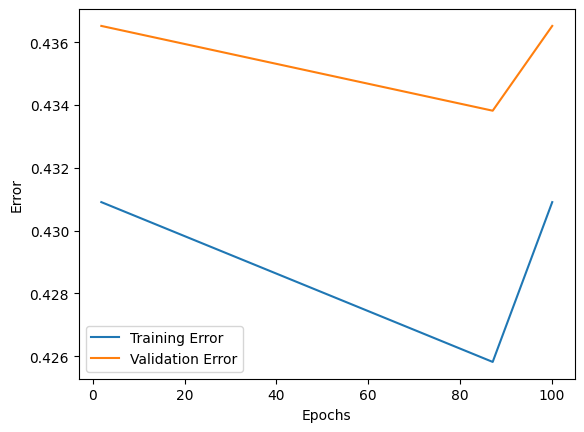

In [23]:
# Graficar el Loss en cada época de entrenamiento y validación
training_metrics = modelo_nn.score_history()
plt.plot(training_metrics['epochs'], training_metrics['training_classification_error'], label='Training Error')
plt.plot(training_metrics['epochs'], training_metrics['validation_classification_error'], label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [24]:
# Cierra el cluster de H2O
h2o.cluster().shutdown()

H2O session _sid_ae0a closed.


### Inception

In [25]:
from keras.applications import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.layers import GlobalAveragePooling1D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Asumiendo que Spectra_set y y están definidos

num_classes = 3  # Número de clases

# Aigna un número entero a cada clase
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Spectra_set, y, test_size=0.252371, random_state=42)

# Convierte las etiquetas a codificación one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Cargar el modelo preentrenado InceptionV3

#base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(((len(X[0]),1)), 1)) #imagenet impone pesos preentrenados para imagenes
base_model = InceptionV3(weights=None, include_top=False, input_shape=(len(X[0]), 1, 1))  #imagenet impone pesos preentrenados para imagenes

# Agregar capas adicionales al modelo
x = base_model.output
x = GlobalAveragePooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Guardar el modelo
model.save("mi_modelo_clasificacion_inception.h5")

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualización del rendimiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

NameError: name 'y' is not defined